# CASA0007 Quantitative Methods Assignment 1
- Rearch title: How does social factors affect crime rate in London? (**TO BE COMFIRMED**)
- Assumptions:(**TO BE COMFIRMED**)

## 1.Load required packages

In [414]:
# Load required libiaries
import sys
print(sys.version)
print(sys.executable)

import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

import statsmodels
print(statsmodels.__version__)

3.10.5 | packaged by conda-forge | (main, Jun 14 2022, 07:04:59) [GCC 10.3.0]
/opt/conda/bin/python
0.13.2


## 2.Description of the datasets

**Area_coverage**: London by Borough Level

**Time_coverage**: 2016

**Columns**:
1. 'crime_rate', data originally from [Recorded Crime: Borough Rates](https://data.london.gov.uk/dataset/recorded_crime_rates)
2. 'population_density', data originally from [Land Area and Population Density, Ward and Borough](https://data.london.gov.uk/dataset/land-area-and-population-density-ward-and-borough)
3. 'house_price', data originally from [Average House Prices by Borough, Ward, MSOA & LSOA](https://data.london.gov.uk/dataset/average-house-prices)
4. 'earning_below_LLW', data originally from [Employees earning below the London Living Wage (LLW)](https://data.london.gov.uk/dataset/earning-below-llw)
5. 'employment_score', data originally from [Indices of Deprivation](https://data.london.gov.uk/dataset/indices-of-deprivation)

In [415]:
# Plots by Ziyue?

In [416]:
# Load data
rawdata = pd.read_csv('https://raw.githubusercontent.com/Murphy829/QM_A1/main/final_dataset06122022.csv')
rawdata.info()
rawdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Code                32 non-null     object 
 1   Area_name           32 non-null     object 
 2   crime_rate          32 non-null     float64
 3   population_density  32 non-null     float64
 4   house_price         32 non-null     float64
 5   earning_below_LLW   32 non-null     float64
 6   employment_score    32 non-null     float64
dtypes: float64(5), object(2)
memory usage: 1.9+ KB


,Code,Area_name,crime_rate,population_density,house_price,earning_below_LLW,employment_score
0,E09000002,Barking and Dagenham,86.5288,56.0455,245.5000,25.0000,0.1581
1,E09000003,Barnet,65.7851,43.7825,450.0000,28.3000,0.0887
2,E09000004,Bexley,52.2173,40.0078,285.0000,34.8000,0.0948
3,E09000005,Brent,80.6390,75.1402,415.0000,32.0000,0.1192
4,E09000006,Bromley,65.0656,21.6747,375.0000,27.2000,0.0864


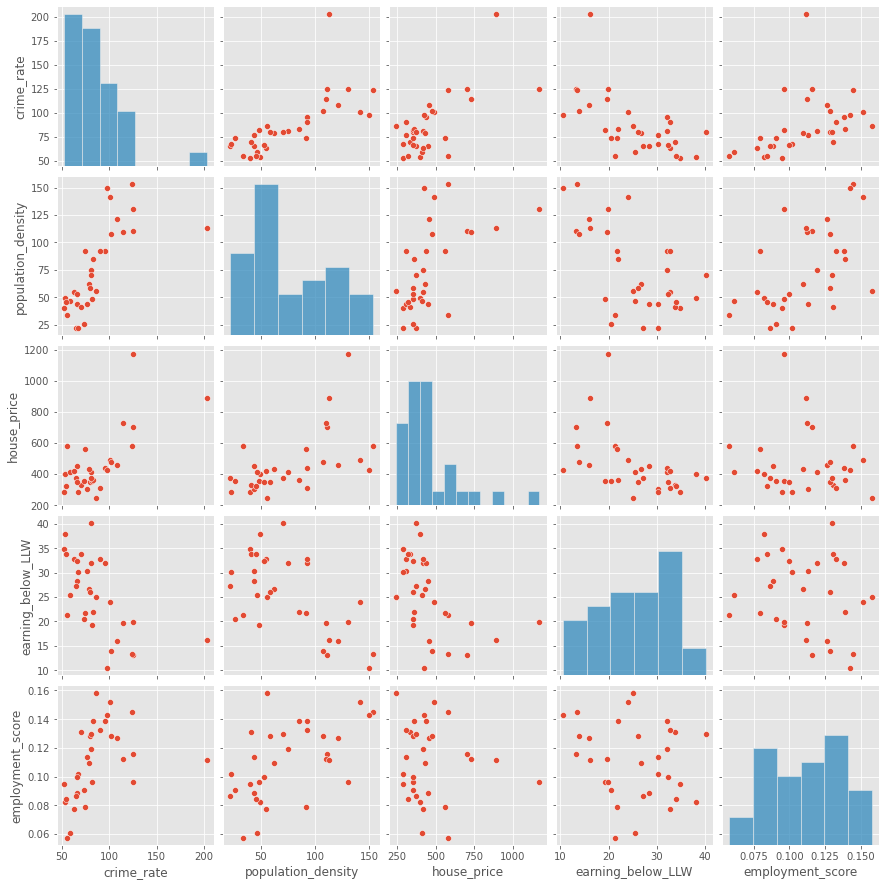

In [417]:
sn.pairplot(df[['crime_rate','population_density','house_price','earning_below_LLW','employment_score']])
plt.savefig("Pairplot.png")

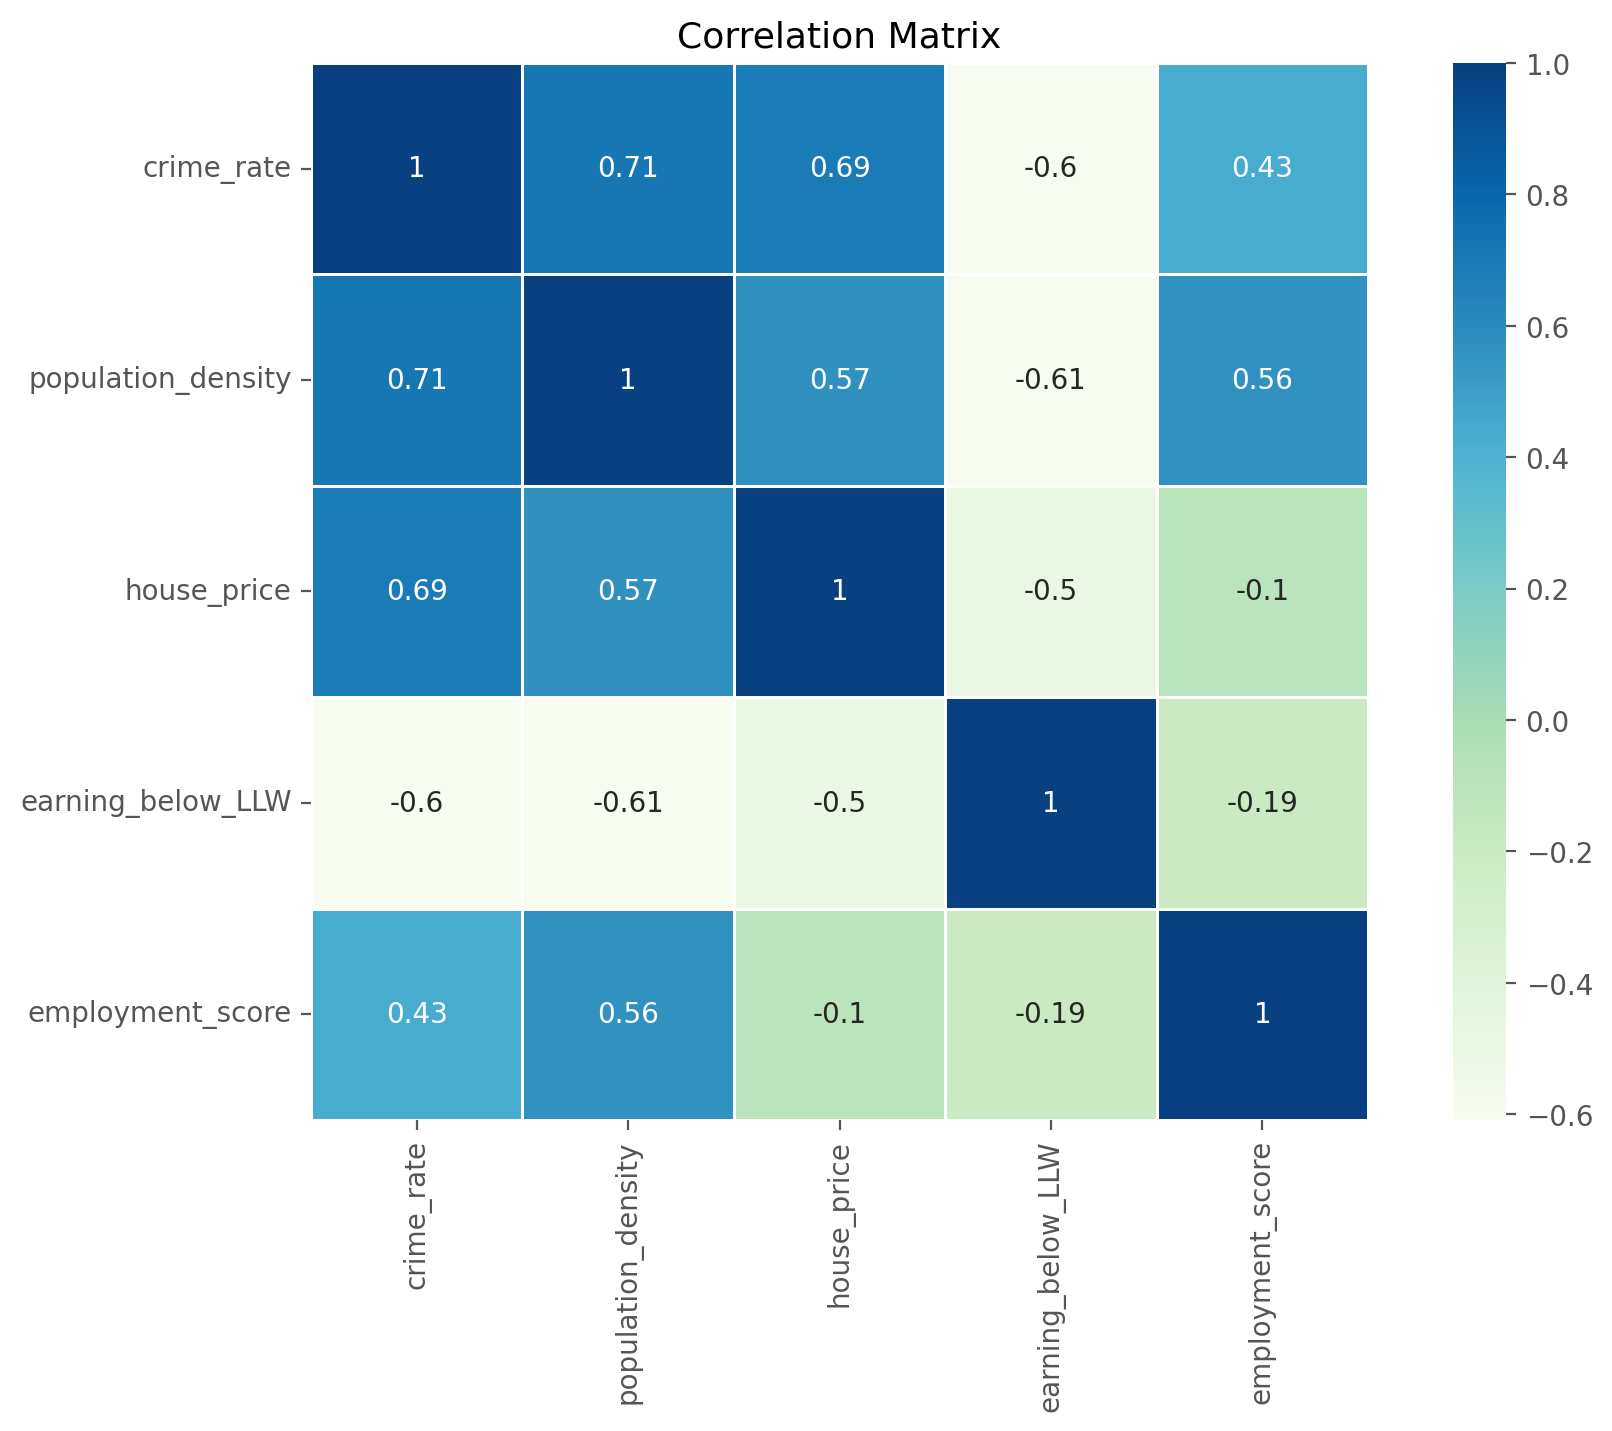

In [418]:
# Check the correlations
df = rawdata
plt.figure(figsize=(11, 7),dpi=200)
plt.title('Correlation Matrix',fontdict={'fontsize':13})
sn.heatmap(df.corr(), 
           cmap='GnBu',
           vmax=1,
           square=True,
           annot=True,
           linewidths=.5)
plt.savefig("Correlation Matrix.png")

## 3.Checking the correlation between variables

In [422]:
# build the model, using this equation to formalute the regression model
# 'crime_rate ~ population_density + house_price + earning_belo_LLW + employment_score'
model_crime_rate = sm.formula.ols('crime_rate ~ population_density + house_price + earning_below_LLW + employment_score', df).fit()
model_crime_rate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     21.55
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           4.44e-08
Time:                        23:57:50   Log-Likelihood:                -130.84
No. Observations:                  32   AIC:                             271.7
Df Residuals:                      27   BIC:                             279.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.3828     24.387     -0.098      0.923     -52.421      47.655
population_density    -0.0853      0.148     -0.577      0.569      -0.389       0.218
house_price            0.1091      0.023      4.733      0.000       0.062       0.156
earning_below_LLW     -0.8448      0.470     -1.797      0.084      -1.810       0.120
employment_score     600.9811    167.698      3.584      0.001     256.894     945.068
==============================================================================
Omnibus:                       38.858   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.599
Skew:                           2.376   Prob(JB):                     9.01e-38
Kurtosis:                      13.265   Cond. No.                     3.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [423]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df.loc[:,['population_density', 'house_price', 'earning_below_LLW', 'employment_score']], df.crime_rate)

# The coefficients
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [-8.53202419e-02  1.09144664e-01 -8.44803752e-01  6.00981110e+02]


## 4.Using VIF to deal with multicollinearity

In [424]:
# Check VIF
df_check = df[list(df.columns[3:])]
df_with_const = add_constant(df_check)

vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()
vif_df = vif_df.drop('const')
vif_df

,VIF
population_density,4.0871
house_price,2.4558
earning_below_LLW,1.7003
employment_score,2.4148


In [425]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly 
    the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [426]:
# Drop collinear variables
df_new = drop_column_using_vif_(df.drop(['Code','Area_name','crime_rate'],axis=1))

In [427]:
# None of columns were dropped
df_new.head()

,population_density,house_price,earning_below_LLW,employment_score
0,56.0455,245.5000,25.0000,0.1581
1,43.7825,450.0000,28.3000,0.0887
2,40.0078,285.0000,34.8000,0.0948
3,75.1402,415.0000,32.0000,0.1192
4,21.6747,375.0000,27.2000,0.0864


In [428]:
# Check VIF again
df_with_const = add_constant(df_new)

vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()
vif_df = vif_df.drop('const')
vif_df

,VIF
population_density,4.0871
house_price,2.4558
earning_below_LLW,1.7003
employment_score,2.4148


## 5.Building and interpreting a linear regression model

### Building the model

In [429]:
# using VIF on the bike_rental dataset
df_predictors_selected_VIF = df_new = drop_column_using_vif_(df.drop(['Code','Area_name','crime_rate'],axis=1))
print("The columns remaining after VIF selection are:")
print(df_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['population_density', 'house_price', 'earning_below_LLW',
       'employment_score'],
      dtype='object')


In [430]:
model_crime_rate2 = sm.OLS(endog=df[['crime_rate']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_crime_rate2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     21.55
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           4.44e-08
Time:                        23:57:54   Log-Likelihood:                -130.84
No. Observations:                  32   AIC:                             271.7
Df Residuals:                      27   BIC:                             279.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.3828     24.387     -0.098      0.923     -52.421      47.655
population_density    -0.0853      0.148     -0.577      0.569      -0.389       0.218
house_price            0.1091      0.023      4.733      0.000       0.062       0.156
earning_below_LLW     -0.8448      0.470     -1.797      0.084      -1.810       0.120
employment_score     600.9811    167.698      3.584      0.001     256.894     945.068
==============================================================================
Omnibus:                       38.858   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.599
Skew:                           2.376   Prob(JB):                     9.01e-38
Kurtosis:                      13.265   Cond. No.                     3.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Residual analysis

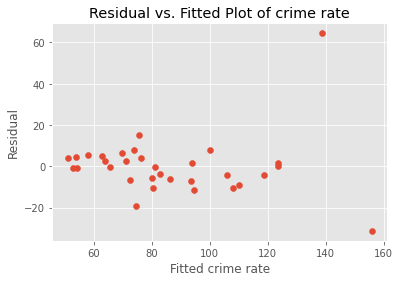

In [431]:
# Residual Analysis of Y value
plt.scatter(model_crime_rate2.fittedvalues, model_crime_rate2.resid)
# adding title and labels

plt.xlabel('Fitted crime rate')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of crime rate')
plt.savefig("Res_vs_fit_crime_rate.png")
plt.show()

### Interpreting the model

In [432]:
# The R-squared value is 0.762, meaning that 76.2% of the total variance of the crime rate can be explained by the variables used in the model.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


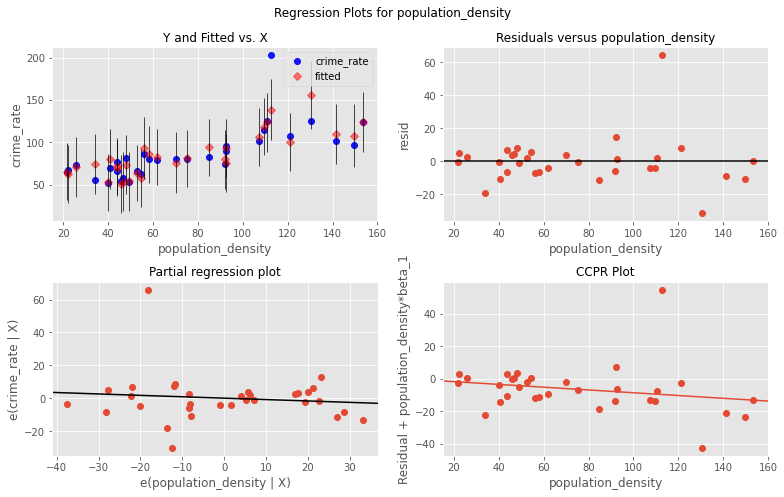

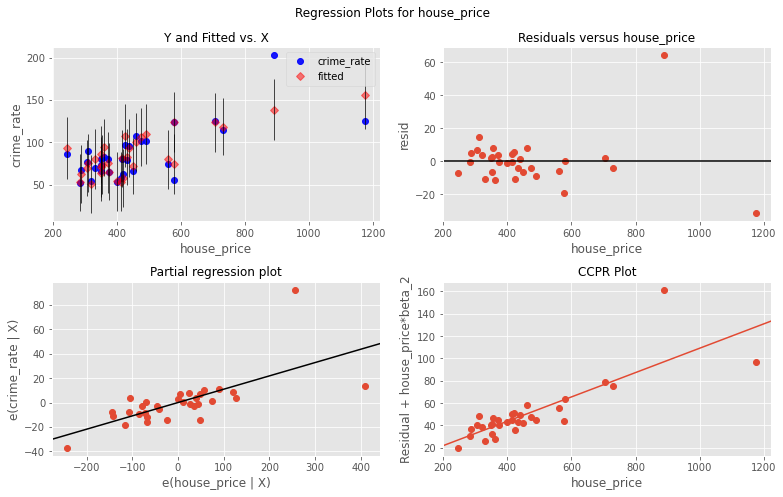

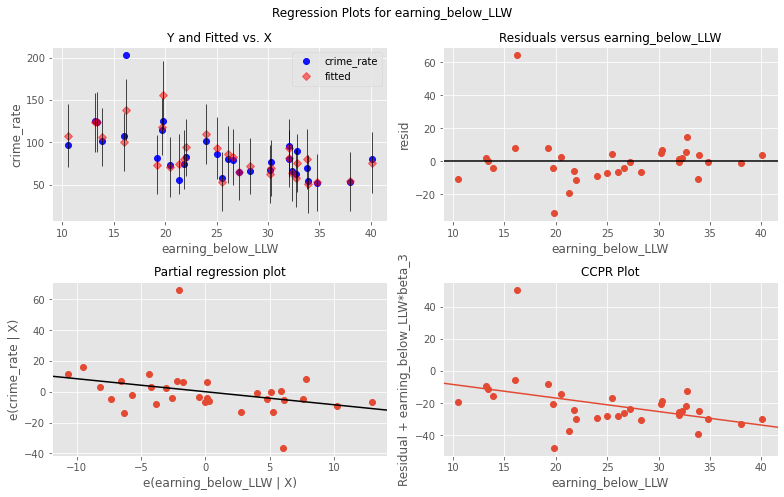

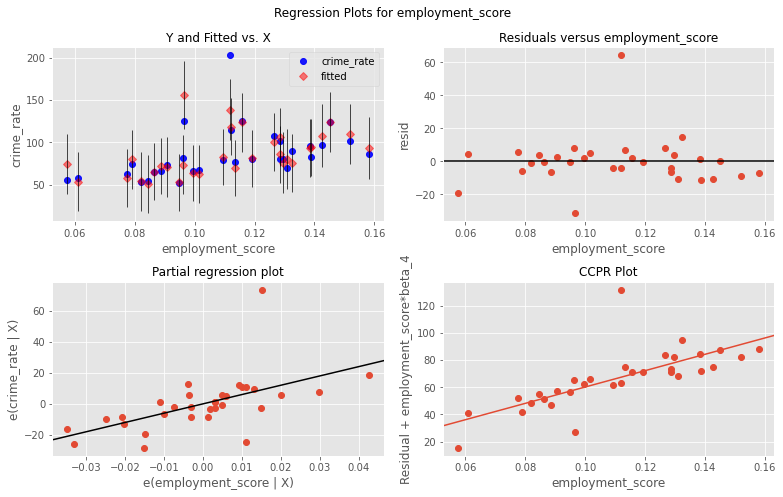

In [433]:
# Residual Analysis of X value
column_names = df_predictors_selected_VIF.columns.values.tolist()
for i in column_names:
    fig = plt.figure(figsize=(11,7))
    fig = sm.graphics.plot_regress_exog(model_crime_rate2, i, fig=fig)
    plt.savefig(i+"_fit_vs_Res.png")

## 6.Adjusted R-squared

In [434]:
df_predictors_adding_random = df_predictors_selected_VIF
# using a seed to make the result reproducible
np.random.seed(420)
# adding 'totally_random', which is random noise and shows no relationship with the response variable
df_predictors_adding_random['totally_random'] = np.random.normal(0,5,df_predictors_adding_random.shape[0])
# the model without windspeed
model_crate_rate2_adding_random = sm.OLS(endog=df[['crime_rate']], exog=sm.add_constant(df_predictors_adding_random)).fit()
model_crate_rate2_adding_random.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     19.11
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           5.69e-08
Time:                        23:58:01   Log-Likelihood:                -129.10
No. Observations:                  32   AIC:                             270.2
Df Residuals:                      26   BIC:                             279.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2080     23.569     -0.009      0.993     -48.654      48.238
population_density    -0.0438      0.145     -0.303      0.764      -0.341       0.254
house_price            0.1050      0.022      4.690      0.000       0.059       0.151
earning_below_LLW     -0.7219      0.459     -1.572      0.128      -1.666       0.222
employment_score     544.8926    165.059      3.301      0.003     205.610     884.175
totally_random         0.9086      0.525      1.729      0.096      -0.172       1.989
==============================================================================
Omnibus:                       36.082   Durbin-Watson:                   1.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.060
Skew:                           2.235   Prob(JB):                     1.73e-30
Kurtosis:                      12.100   Cond. No.                     3.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 7.Building a logistic regression model

In [435]:
df.describe()

,crime_rate,population_density,house_price,earning_below_LLW,employment_score
count,32.0000,32.0000,32.0000,32.0000,32.0000
mean,85.9859,74.6095,457.4452,25.4094,0.1103
std,30.0360,38.5931,191.8090,7.8273,0.0262
min,52.2173,21.6747,245.5000,10.5000,0.0575
25%,66.0692,45.2559,350.7500,19.7750,0.0902
50%,80.1320,59.9413,414.2500,25.8000,0.1119
75%,98.3262,107.8432,478.7500,32.0750,0.1299
max,203.0714,153.4969,"1,175.0000",40.1000,0.1581


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------------------------------------------
Print the model:
population_density : 0.12231684281811203
house_price : -0.0051139073762222105
earning_below_LLW : -0.04998506211846667
employment_score : 0.05551484514703174
totally_random : -0.006981770656108633
------------------------------------------
Accuracy of the model is: 0.90625
The confusion matrix is:


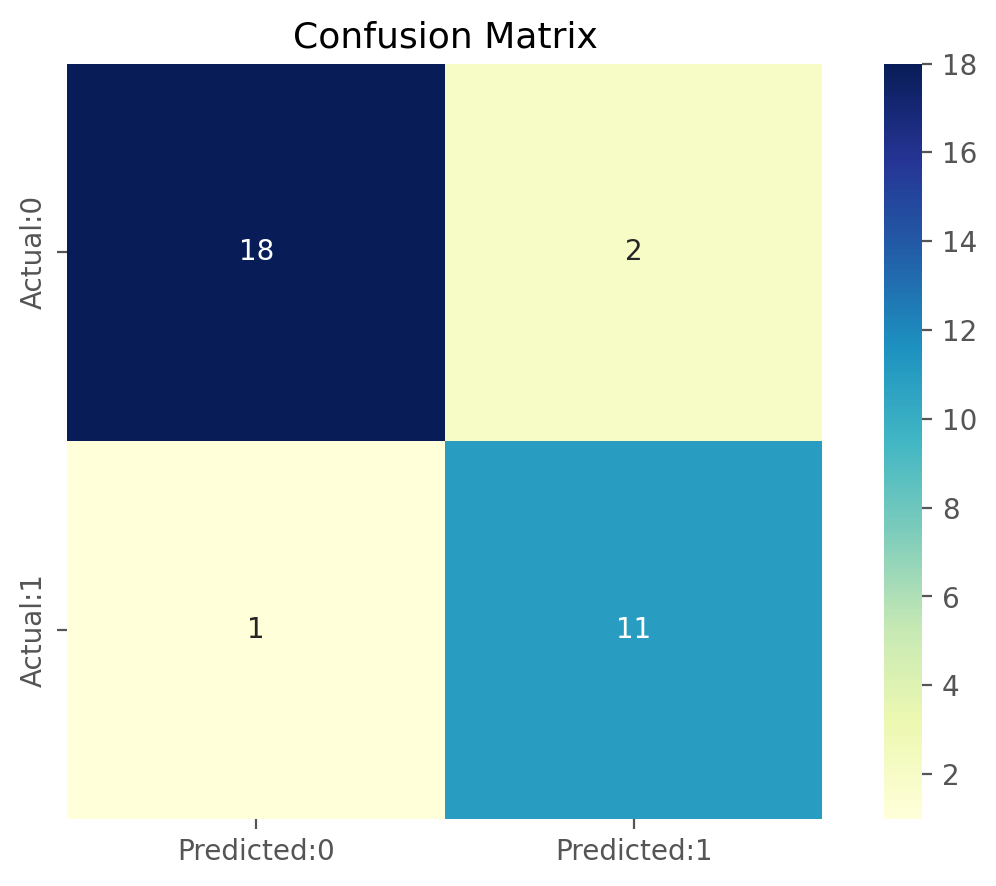

In [436]:
# Choose mean value of crime rate as threshold, if crime rate is larger than 86, it is of Class 'True'. Otherwise, it is in Class 'False'.
threshold_crime_rate = 86

X = df_predictors_selected_VIF
y = df[['crime_rate']] > threshold_crime_rate
###################

logreg = LogisticRegression()
logreg.fit(X, y)
y_pred=logreg.predict(X)

# print the coefficient in the model
print("------------------------------------------")
print("Print the model:")
coef_dict = {}
for coef, feat in zip(logreg.coef_.flatten().tolist(),X.columns):
    coef_dict[feat] = coef
    print(feat, ":", coef)
print("------------------------------------------")
    
acc = sklearn.metrics.accuracy_score(y,y_pred)
print("Accuracy of the model is: " + str(acc))

# Another evaluation: confusion matrix
print("The confusion matrix is:")
cm=confusion_matrix(y,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5),dpi=200)
plt.title('Confusion Matrix',fontdict={'fontsize':13})
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu",square=True)
plt.savefig("Confusion_martix.png")

The accuracy of this classification is 0.906, meaning that the model can correctly predict 90.6% of the crime rate regarding whether it is larger than 86.

The confustion matrix shows the number of occurrences in the four combinations between actual and predicted types. For example, there are 11 samples that are correctly predicted as Type 1 (i.e. over 86).

## 8.Conclusion

(**TO BE COMFIRMED**)

Crime rates are positively correlated with population density, house prices and employment rates, and negatively correlated with the proportion of employees earning below the London Living Wage.